# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [4]:
import sys  
!{sys.executable} -m pip install --user matplotlib

  Using cached matplotlib-3.5.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [56]:
chipo_df = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")

### Step 4. See the first 10 entries

In [57]:
chipo_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<AxesSubplot:xlabel='item_name'>

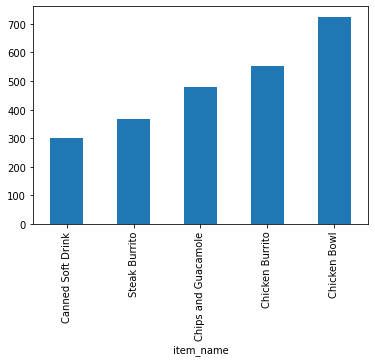

In [38]:
top_items = chipo_df.groupby("item_name")["quantity"].count().sort_values().tail(5)
top_items.plot.bar()

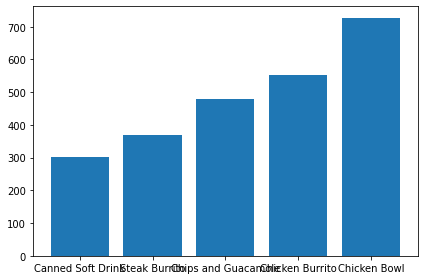

In [31]:
plt.bar(top_items.index, top_items)
plt.tight_layout()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [65]:
chipo_df["item_price"] = chipo_df["item_price"].map(lambda x: x[1:]).astype('float')

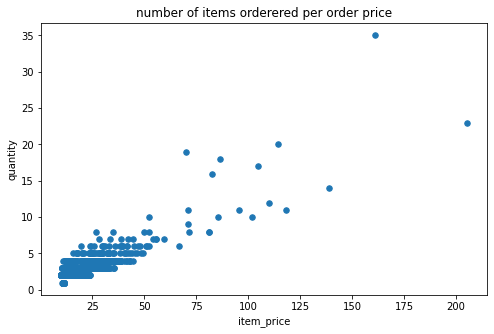

In [77]:
no_items_df = chipo_df.groupby("order_id").sum()
no_items_df.plot.scatter(x="item_price",
                         y="quantity",
                         s=30,
                         title="number of items orderered per order price",
                         figsize=(8,5));

### Step 7. BONUS: Create a question and a graph to answer your own question.
Create a scatterplot with the mean of items orderered per order price

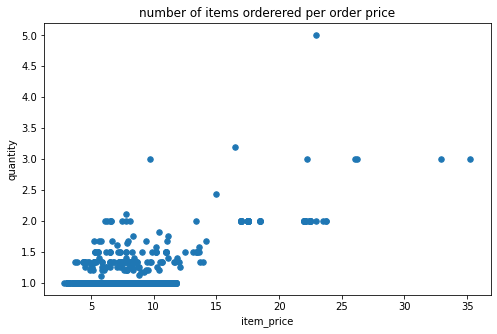

In [88]:
chipo_df.groupby("order_id").mean().plot.scatter(x="item_price",
                         y="quantity",
                         s=30,
                         title="number of items orderered per order price",
                         figsize=(8,5));